In [2]:
## This is a demo project to find statistical pattern of raw data

In [10]:
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
#To plot the graph embedded in the notebook
%matplotlib inline

In [11]:
evaluation_df=pd.read_excel('evaluation_demo.xlsx')
evaluation_df
#please install openpyxl in pip before loading the excel file

,SN,BCT Name,String,TS,TV,RE,SE,SC,EE,PE,JR,Ex,Im,SI,PV,TL
0,1,Bitcoin,blah blah blah,2,2,2.0,2.0,NaN,10,2,NaN,NaN,2,2.0,2.0,3
1,2,Bitcoin,blah blah blah,10,10,10.0,10.0,2.0,2,10,NaN,10.0,10,NaN,10.0,9
2,3,Bitcoin,blah blah blah,4,4,8.0,8.0,NaN,4,8,NaN,NaN,8,6.0,6.0,7
3,4,Bitcoin,blah blah blah,6,6,6.0,8.0,NaN,6,6,NaN,6.0,6,6.0,4.0,6
4,5,Bitcoin,blah blah blah,4,4,4.0,6.0,8.0,4,8,NaN,NaN,8,NaN,6.0,5
5,6,Bitcoin,blah blah blah,10,10,NaN,NaN,2.0,2,10,NaN,10.0,10,NaN,NaN,9


In [12]:
evaluation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SN        6 non-null      int64  
 1   BCT Name  6 non-null      object 
 2   String    6 non-null      object 
 3   TS        6 non-null      int64  
 4   TV        6 non-null      int64  
 5   RE        5 non-null      float64
 6   SE        5 non-null      float64
 7   SC        3 non-null      float64
 8   EE        6 non-null      int64  
 9   PE        6 non-null      int64  
 10  JR        0 non-null      float64
 11  Ex        3 non-null      float64
 12  Im        6 non-null      int64  
 13  SI        3 non-null      float64
 14  PV        5 non-null      float64
 15  TL        6 non-null      int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 896.0+ bytes


In [47]:
#Preprocessing
evaluation_df.isnull().mean()
print(evaluation_df)
evaluation_df

   SN BCT Name          String  TS  TV    RE    SE   SC  EE  PE   JR    Ex  \
0   1  Bitcoin  blah blah blah   2   2   2.0   2.0  0.0  10   2  0.0   0.0   
1   2  Bitcoin  blah blah blah  10  10  10.0  10.0  2.0   2  10  0.0  10.0   
2   3  Bitcoin  blah blah blah   4   4   8.0   8.0  0.0   4   8  0.0   0.0   
3   4  Bitcoin  blah blah blah   6   6   6.0   8.0  0.0   6   6  0.0   6.0   
4   5  Bitcoin  blah blah blah   4   4   4.0   6.0  8.0   4   8  0.0   0.0   
5   6  Bitcoin  blah blah blah  10  10   0.0   0.0  2.0   2  10  0.0  10.0   

   Im   SI    PV  TL  
0   2  2.0   2.0   3  
1  10  0.0  10.0   9  
2   8  6.0   6.0   7  
3   6  6.0   4.0   6  
4   8  0.0   6.0   5  
5  10  0.0   0.0   9  


,SN,BCT Name,String,TS,TV,RE,SE,SC,EE,PE,JR,Ex,Im,SI,PV,TL
0,1,Bitcoin,blah blah blah,2,2,2.0,2.0,0.0,10,2,0.0,0.0,2,2.0,2.0,3
1,2,Bitcoin,blah blah blah,10,10,10.0,10.0,2.0,2,10,0.0,10.0,10,0.0,10.0,9
2,3,Bitcoin,blah blah blah,4,4,8.0,8.0,0.0,4,8,0.0,0.0,8,6.0,6.0,7
3,4,Bitcoin,blah blah blah,6,6,6.0,8.0,0.0,6,6,0.0,6.0,6,6.0,4.0,6
4,5,Bitcoin,blah blah blah,4,4,4.0,6.0,8.0,4,8,0.0,0.0,8,0.0,6.0,5
5,6,Bitcoin,blah blah blah,10,10,0.0,0.0,2.0,2,10,0.0,10.0,10,0.0,0.0,9


In [48]:
evaluation_df.describe()

,SN,TS,TV,RE,SE,SC,EE,PE,JR,Ex,Im,SI,PV,TL
count,6.000000,6.00000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,6.00000,6.00000,5.000000,5.666667,2.000000,4.666667,7.333333,0.0,4.333333,7.333333,2.333333,4.666667,6.500000
std,1.870829,3.34664,3.34664,3.741657,3.881580,3.098387,3.011091,3.011091,0.0,4.966555,3.011091,2.943920,3.502380,2.345208
min,1.000000,2.00000,2.00000,0.000000,0.000000,0.000000,2.000000,2.000000,0.0,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2.250000,4.00000,4.00000,2.500000,3.000000,0.000000,2.500000,6.500000,0.0,0.000000,6.500000,0.000000,2.500000,5.250000
50%,3.500000,5.00000,5.00000,5.000000,7.000000,1.000000,4.000000,8.000000,0.0,3.000000,8.000000,1.000000,5.000000,6.500000
75%,4.750000,9.00000,9.00000,7.500000,8.000000,2.000000,5.500000,9.500000,0.0,9.000000,9.500000,5.000000,6.000000,8.500000
max,6.000000,10.00000,10.00000,10.000000,10.000000,8.000000,10.000000,10.000000,0.0,10.000000,10.000000,6.000000,10.000000,9.000000


<AxesSubplot:>

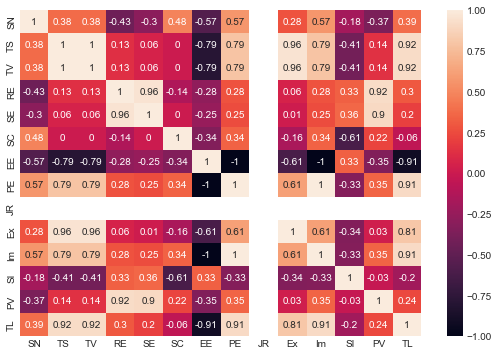

In [49]:
correlation_matrix=evaluation_df.corr().round(2)
plt.figure(figsize=(9,6))
sns.heatmap(data=correlation_matrix, annot=True)

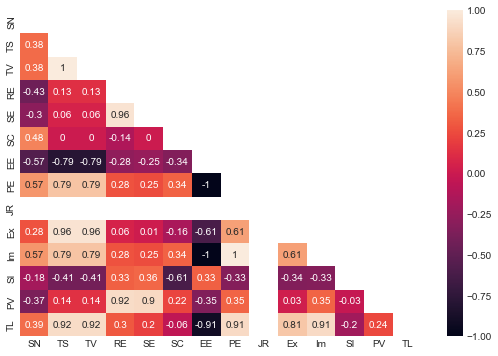

In [50]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

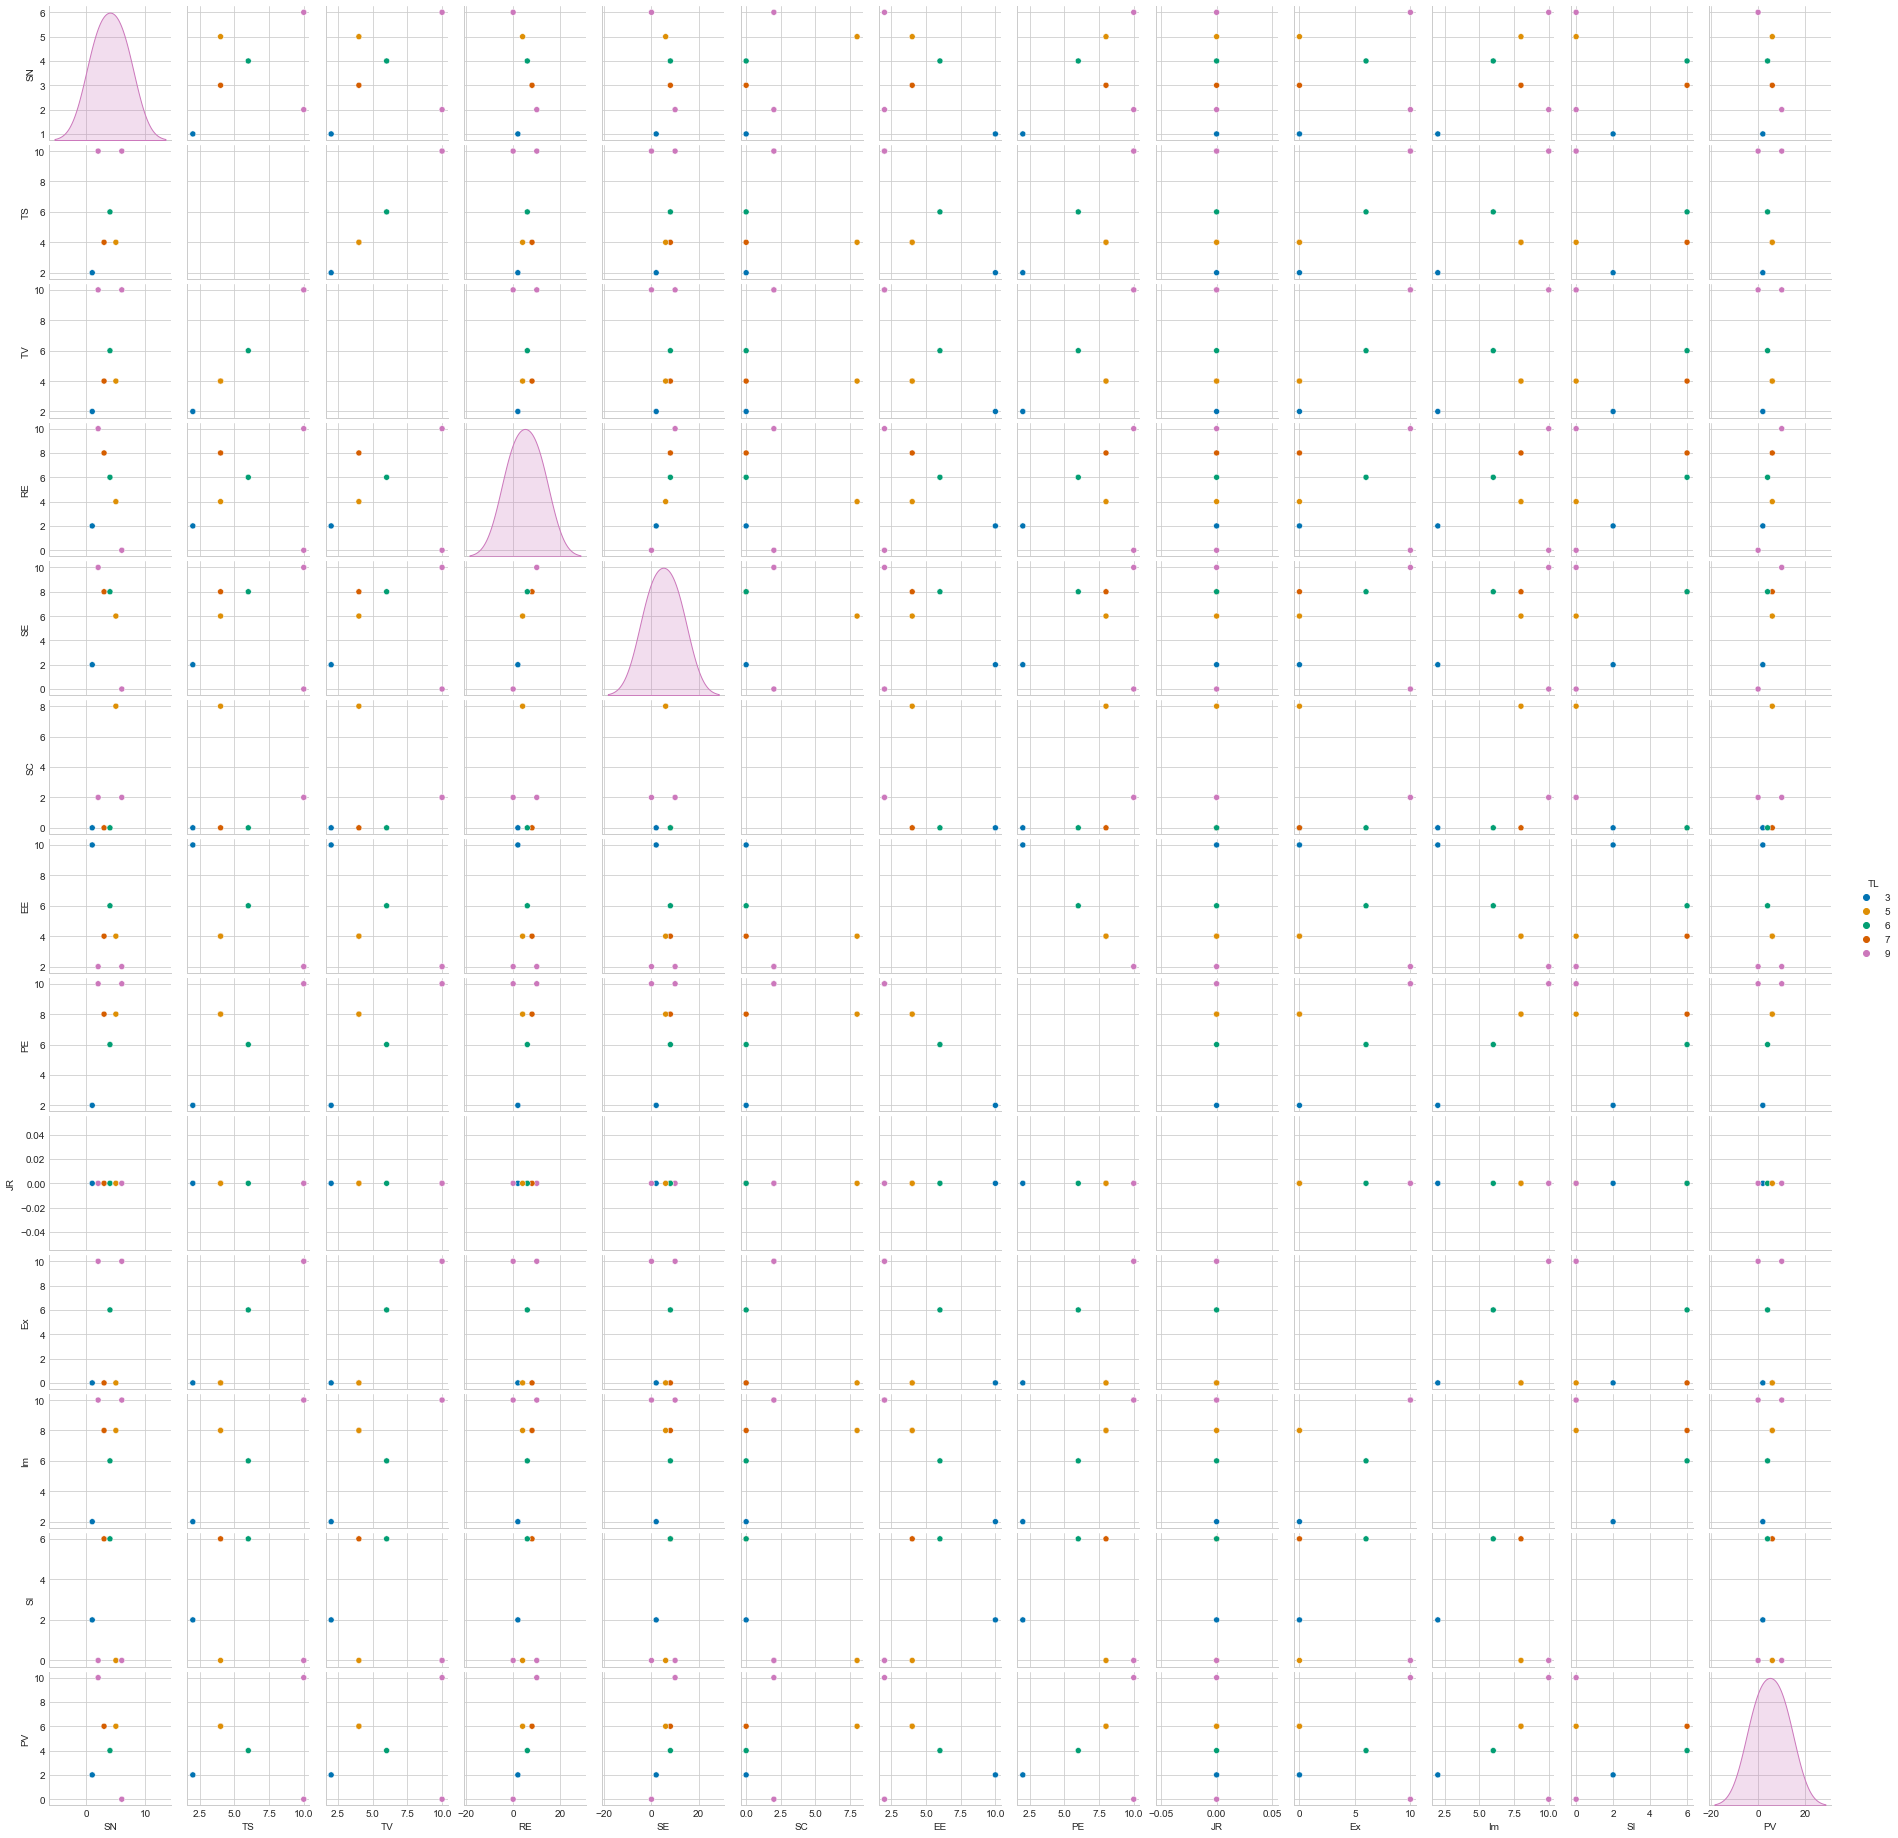

In [51]:
sns.pairplot(evaluation_df, hue="TL",height=2, palette = 'colorblind');

In [52]:
X=evaluation_df[['TS','TV','RE','SE','SC','PE','EE','Ex','Im','SI']]
X

,TS,TV,RE,SE,SC,PE,EE,Ex,Im,SI
0,2,2,2.0,2.0,0.0,2,10,0.0,2,2.0
1,10,10,10.0,10.0,2.0,10,2,10.0,10,0.0
2,4,4,8.0,8.0,0.0,8,4,0.0,8,6.0
3,6,6,6.0,8.0,0.0,6,6,6.0,6,6.0
4,4,4,4.0,6.0,8.0,8,4,0.0,8,0.0
5,10,10,0.0,0.0,2.0,10,2,10.0,10,0.0


In [53]:
y=evaluation_df['TL']
y

0    3
1    9
2    7
3    6
4    5
5    9
Name: TL, dtype: int64

In [54]:
#Create Model: Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4, 10)
X_test shape:  (2, 10)
y_train shape:  (4,)
y_test shape:  (2,)


In [55]:
 # importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.0
----------------------------------


In [56]:
 # importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.0
---------------------------------


In [69]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))


----------------------------------
The accuracy of the KNN is: 0.0
----------------------------------


In [70]:
 # importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.0
---------------------------------


In [71]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.0
---------------------------------


In [72]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)


The accuracy scores of different Models:
----------------------------------------
('SVM', 0.0)
('NB', 0.0)
('LR', 0.0)
('KNN', 0.0)
('DT', 0.0)
